In [1]:
# load GloVe file: glove.6B.300d.txt
import numpy as np

embeddings_dict = {}
with open("./glove/glove.6B.300d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [2]:
len(embeddings_dict.keys())

400001

In [3]:
embeddings_dict['love']

array([-4.5205e-01, -3.3122e-01, -6.3607e-02,  2.8325e-02, -2.1372e-01,
        1.6839e-01, -1.7186e-02,  4.7309e-02, -5.2355e-02, -9.8706e-01,
        5.3762e-01, -2.6893e-01, -5.4294e-01,  7.2487e-02,  6.6193e-02,
       -2.1814e-01, -1.2113e-01, -2.8832e-01,  4.8161e-01,  6.9185e-01,
       -2.0022e-01,  1.0082e+00, -1.1865e-01,  5.8710e-01,  1.8482e-01,
        4.5799e-02, -1.7836e-02, -3.3952e-01,  2.9314e-01, -1.9951e-01,
       -1.8930e-01,  4.3267e-01, -6.3181e-01, -2.9510e-01, -1.0547e+00,
        1.8231e-01, -4.5040e-01, -2.7800e-01, -1.4021e-01,  3.6785e-02,
        2.6487e-01, -6.6712e-01, -1.5204e-01, -3.5001e-01,  4.0864e-01,
       -7.3615e-02,  6.7630e-01,  1.8274e-01, -4.1660e-02,  1.5014e-02,
        2.5216e-01, -1.0109e-01,  3.1915e-02, -1.1298e-01, -4.0147e-01,
        1.7274e-01,  1.8497e-03,  2.4456e-01,  6.8777e-01, -2.7019e-01,
        8.0728e-01, -5.8296e-02,  4.0550e-01,  3.9893e-01, -9.1688e-02,
       -5.2080e-01,  2.4570e-01,  6.3001e-02,  2.1421e-01,  3.31

In [4]:
embeddings_dict['love'].shape

(300,)

In [5]:
# find similar word
# euclidean distance
from scipy.spatial.distance import euclidean

def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), 
                  key=lambda word: euclidean(embeddings_dict[word], embedding)) # 根據 euclidean大小排序

print(find_closest_embeddings(embeddings_dict["king"])[1:10])

['queen', 'monarch', 'prince', 'kingdom', 'reign', 'ii', 'iii', 'brother', 'crown']


['so', 'them', 'what', 'him', 'united', 'during', 'before', 'may', 'since', 'many', 'while', 'where', 'states', 'because', 'now', 'city', 'made', 'like', 'between', 'did', 'just', 'national', 'day', 'country', 'under', 'such', 'second', 'then', 'company', 'group', 'any', 'through', 'china', 'four', 'being', 'down', 'war', 'back', 'off', 'south', 'american', 'minister', 'police', 'well', 'including', 'team', 'international', 'week', 'officials', 'still']
vectors shape: (50, 300)


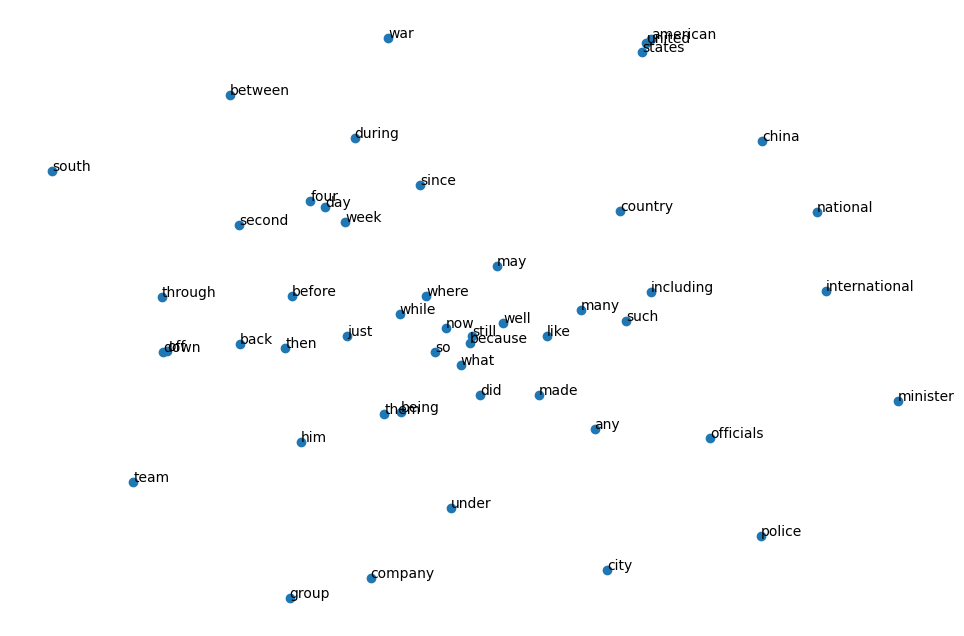

In [10]:
# 任意選 100 個單字
words =  list(embeddings_dict.keys())[100:150]
print(words)

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 以 T-SNE 降維至二個特徵
tsne = TSNE(n_components=2)
vectors = np.array([embeddings_dict[word] for word in words])
print("vectors shape:", vectors.shape)
Y = tsne.fit_transform(vectors)

# 繪製散佈圖，觀察單字相似度
plt.figure(figsize=(12, 8))
plt.axis('off')
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")

In [1]:
import torch
from torchtext.vocab import GloVe

glove = GloVe(name='6B', dim=100)

In [ ]:
import torchtext